In [1]:
#import all the important libraries required for developing the model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [2]:
#reading the dataset with the help of pandas library.
kc = pd.read_csv("C:\\Users\Suyash Pandey\OneDrive\Desktop\kc_house_data.csv")

In [3]:
#displaying first five rows of the dataframe using the head command
kc.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
#Other information of the dataset
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#description of the dataset
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0.5, 1.0, 'graph between sqft living and price of the house')

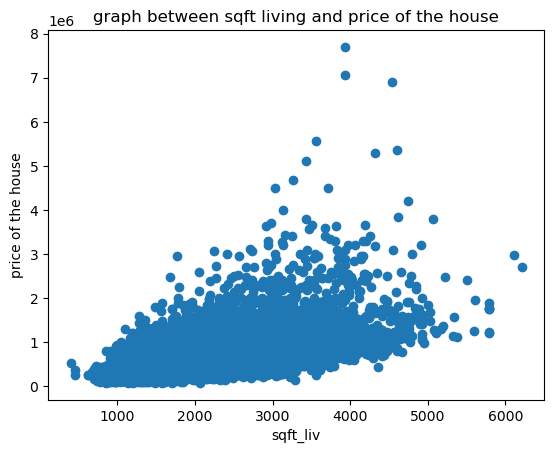

In [6]:
#graph  between sqft_living15 and price of the house
x = kc['sqft_living15']
y = kc[['price']]
plt.scatter(x,y)
plt.xlabel('sqft_liv')
plt.ylabel('price of the house')
plt.title('graph between sqft living and price of the house')

In [7]:
#taking all the numerical values in a single variable for plotting the correlation heatmap.
x_numerical_values = kc[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]

<AxesSubplot:>

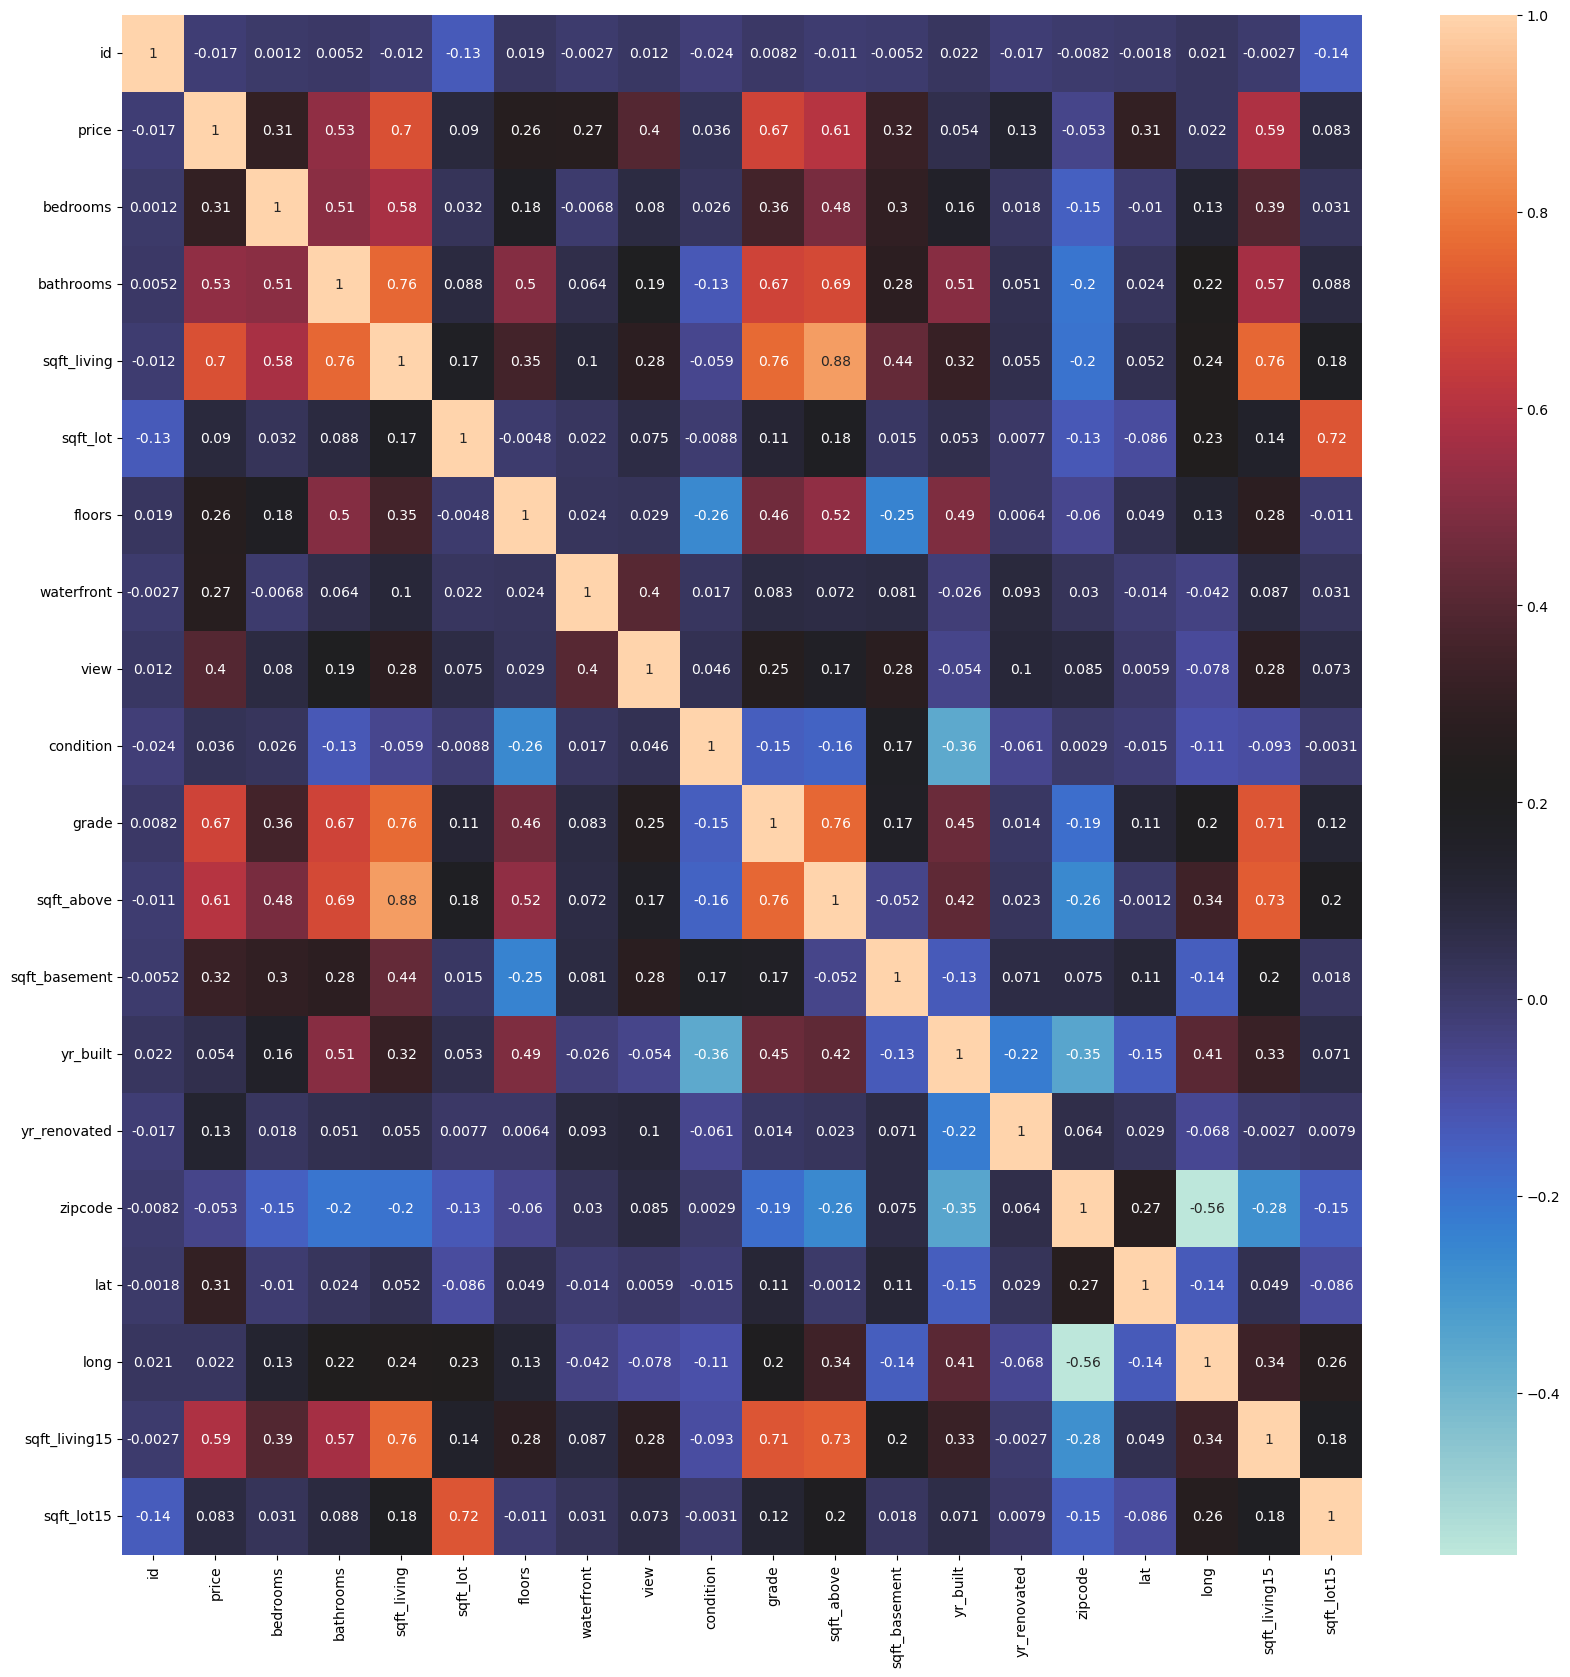

In [8]:
#correlation heatmap of all the numerical values
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(x_numerical_values.corr(), annot = True, cmap = 'icefire')

In [9]:
#total columns in the dataset
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
#features selected as the predictors
selected_features = {'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'}

In [11]:
#taking X as predictor variable and y has been already assigned as the target variable which is the price of the house
X = kc[selected_features]

C:\Users\Suyash Pandey\AppData\Local\Temp\ipykernel_20436\3145681392.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = kc[selected_features]


In [12]:
X

,lat,condition,yr_built,sqft_above,sqft_basement,grade,yr_renovated,sqft_lot15,view,sqft_living15,sqft_living,waterfront,floors,bedrooms,sqft_lot,bathrooms,long
0,47.5112,3,1955,1180,0,7,0,5650,0,1340,1180,0,1.0,3,5650,1.00,-122.257
1,47.7210,3,1951,2170,400,7,1991,7639,0,1690,2570,0,2.0,3,7242,2.25,-122.319
2,47.7379,3,1933,770,0,6,0,8062,0,2720,770,0,1.0,2,10000,1.00,-122.233
3,47.5208,5,1965,1050,910,7,0,5000,0,1360,1960,0,1.0,4,5000,3.00,-122.393
4,47.6168,3,1987,1680,0,8,0,7503,0,1800,1680,0,1.0,3,8080,2.00,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,47.6993,3,2009,1530,0,8,0,1509,0,1530,1530,0,3.0,3,1131,2.50,-122.346
21593,47.5107,3,2014,2310,0,8,0,7200,0,1830,2310,0,2.0,4,5813,2.50,-122.362
21594,47.5944,3,2009,1020,0,7,0,2007,0,1020,1020,0,2.0,2,1350,0.75,-122.299
21595,47.5345,3,2004,1600,0,8,0,1287,0,1410,1600,0,2.0,3,2388,2.50,-122.069


In [13]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21592,360000.0
21593,400000.0
21594,402101.0
21595,400000.0


In [14]:
#displaying the shape of the predictor and target variable
print(X.shape,y.shape)

(21597, 17) (21597, 1)


In [15]:
#normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)

In [16]:
#scaled predictor values
X_scaled

array([[5.71497507e-01, 5.00000000e-01, 4.78260870e-01, ...,
        3.10751079e-03, 6.66666667e-02, 2.17607973e-01],
       [9.08959305e-01, 5.00000000e-01, 4.43478261e-01, ...,
        4.07186891e-03, 2.33333333e-01, 1.66112957e-01],
       [9.36142834e-01, 5.00000000e-01, 2.86956522e-01, ...,
        5.74253455e-03, 6.66666667e-02, 2.37541528e-01],
       ...,
       [7.05324111e-01, 5.00000000e-01, 9.47826087e-01, ...,
        5.02774650e-04, 3.33333333e-02, 1.82724252e-01],
       [6.08975390e-01, 5.00000000e-01, 9.04347826e-01, ...,
        1.13154584e-03, 2.66666667e-01, 3.73754153e-01],
       [7.04841563e-01, 5.00000000e-01, 9.39130435e-01, ...,
        3.36798440e-04, 3.33333333e-02, 1.82724252e-01]])

In [17]:
#shape of scaled values
print(X_scaled.shape)

(21597, 17)


In [18]:
#scaling of target values
y_scaled = Scaler.fit_transform(y)

In [19]:
#scaled target values
y_scaled

array([[0.01887956],
       [0.06035161],
       [0.01338231],
       ...,
       [0.04252178],
       [0.04224613],
       [0.03240619]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [21]:
#shape of training and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16197, 17)
(5400, 17)
(16197, 1)
(5400, 1)


In [22]:
#fitting of training values into the model and calculation of training and testing accuracy of the model.
from sklearn.linear_model import LinearRegression
modellm = LinearRegression()
modellm.fit(X_train,y_train)
print("Training_Score:",modellm.score(X_train, y_train)*100)
print("Testing_score :",modellm.score(X_test, y_test)*100)

Training_Score: 69.06834315974766
Testing_score : 71.09656211570041


In [23]:
#model predicting its own values from the testing dataset
y_predict = modellm.predict(X_test)

In [24]:
#dislaying the predicting values
print(y_predict)

[[0.10042326]
 [0.06924124]
 [0.04113329]
 ...
 [0.11988902]
 [0.03645616]
 [0.0815296 ]]


Text(0, 0.5, 'y_predict')

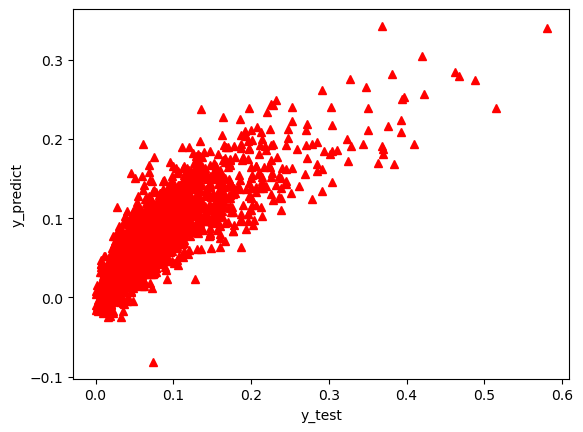

In [25]:
#graph between y_test and y_predict.
plt.plot(y_test,y_predict, '^', color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

Text(0, 0.5, 'true_values')

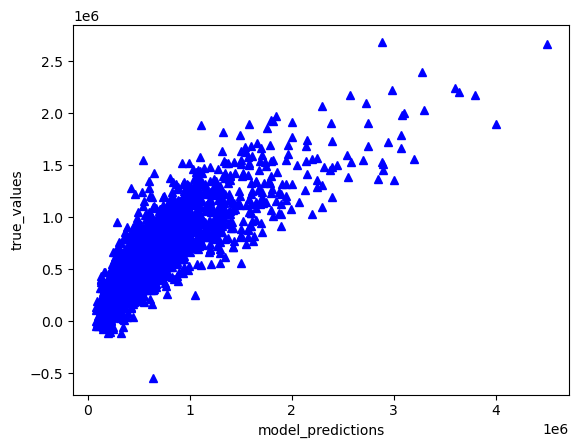

In [26]:
#graph between y_test_original and y_predict_original.
y_predict_original = Scaler.inverse_transform(y_predict)
y_test_original = Scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original,'^',color = 'b')
plt.xlabel('model_predictions')
plt.ylabel('true_values')

In [27]:
#calculating the value of n 
k = X_test.shape
n = len(X_test)
print('value of n:',n)

value of n: 5400


In [28]:
#calculation of Root Mean Squared Error
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original,y_predict_original)), '0.3f'))
print(RMSE)

195836.493


In [29]:
#calculation of Mean Squared Error
MSE = mean_squared_error(y_test_original,y_predict_original)
print(MSE)

38351931798.38389


In [30]:
#calculation of Mean Absolute Error
MAE = mean_absolute_error(y_test_original,y_predict_original)
print(MAE)

126547.073149622


In [31]:
#calculation of R2 score
r2 = r2_score(y_test_original,y_predict_original)
print(r2)

0.7109656211570041
